### The tutorial generally aims to keep things as simple as possible. The intention is to be understandable to first time python users. Using the rather complex code in *heatmap.ipynp* to generate heatmaps  seems to contradict this approach.
# This Notebook explains what that code does and why the simple alternatives (e.g. seaborn and pcolormesh) aren't 100% fit for the task. 

In [1]:
from streakimage import StreakImage

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# We import heatmap.ipynb to easily plot heatmaps
import import_ipynb
from heatmap import heatmap

importing Jupyter notebook from heatmap.ipynb


In [2]:
path_to_bg = "files/example_bg ST4 g20 20x556ms.img"
bg = StreakImage(path_to_bg)

In [3]:
path_to_img = "files/example_streak-image ST4 g20 20x556ms.img"
image =  StreakImage(path_to_img, bg=bg)

### Data plotted with *seaborn*

<AxesSubplot:>

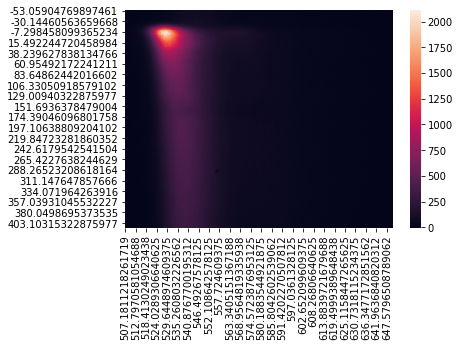

In [4]:
sns.heatmap(image.data)

### Data plotted with *pcolormesh* **without** explicitly delivering the index and columns.

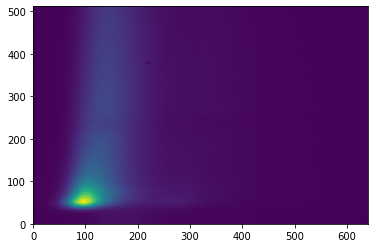

In [5]:
plt.pcolormesh(image.data)

### Data plotted with *pcolormesh* **with** explicitly delivering the index and columns.

<ipython-input-6-44569ec3b509>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(image.data.columns, image.data.index, image.data.values)


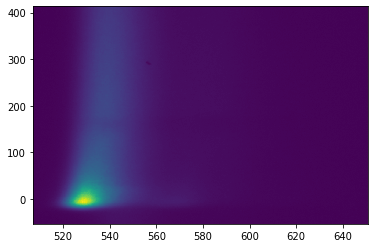

In [6]:
plt.pcolormesh(image.data.columns, image.data.index, image.data.values)

### *heatmap* vs *pcolormesh* with minimal data set

<ipython-input-10-6dc15736b89d>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[0].pcolormesh(small_data.columns, small_data.index, small_data.values)


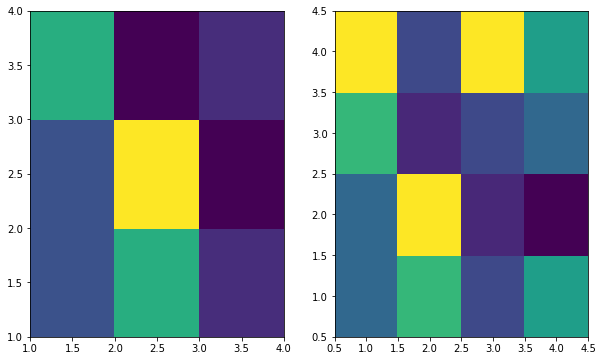

In [10]:
#generate test data
indeces = [1,2,3,4]
columns = [1,2,3,4]
small_data = pd.DataFrame(np.random.randint(0,10, size=(4,4)), index=indeces, columns=columns)

fig, axes = plt.subplots(1,2, figsize=(10,6))

axes[0].pcolormesh(small_data.columns, small_data.index, small_data.values)
heatmap(small_data, axes[1])

Comparison between the outputs of the simple pcolormesh function (top left) the heatmap function (top right) and the underlying values (bottom) clearly exhibits that pcolormesh places the axis labels at one corner of the corresponding coloured field. *heatmap* places them (correctly) at its center.

In [8]:
small_data

,1,2,3,4
1,9,9,2,8
2,2,4,7,1
3,6,0,6,3
4,8,0,9,6


For small numbers of integer values as index and columns (like in this example) seaborn actually works pretty well. 

<AxesSubplot:>

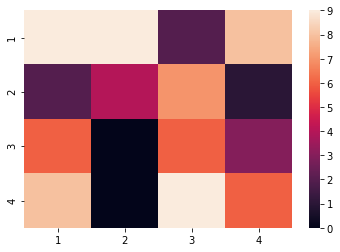

In [9]:
sns.heatmap(small_data)